# **&nbsp;TRABAJO FINAL DEL BOOTCAMP IV BIG DATA & MACHINE LEARNING**

                                           Alumno  Francisco Javier Gonzálvez Chico
                                           Título  Recomendador de Precios para Anfitriones de AirBNB España


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**CUADERNO DE TRABAJO 02**
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Partición del Dataset y Analisis del Subset de Datos de Entrenamiento**

En los notebooks se codificarán las celdas con las que se procesarán las acciones sobre el dataset de trabajo y las ejecuciones de los modelos.
No se comentarán ya que toda la documentación del trabajo se presentará en un documento Word en el que irá incluido este notebook.

 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data_filtrado.csv', sep = ';', decimal = '.')

In [3]:
from sklearn.model_selection import train_test_split
    
train, test = train_test_split(data, test_size = 0.1,
                               shuffle = True, random_state = 0)

print('El subset de Datos para Entrenamiento ha quedado con' + 
      f' {train.shape[0]} filas y {train.shape[1]} columnas')
print('El subset de Datos para Testeo ha quedado con' + 
      f' {test.shape[0]} filas y {test.shape[1]} columnas\n')

train.to_csv('./train.csv', sep = ';', decimal = '.', index = False)
test.to_csv('./test.csv', sep = ';', decimal = '.', index = False)

El subset de Datos para Entrenamiento ha quedado con 27699 filas y 25 columnas
El subset de Datos para Testeo ha quedado con 3078 filas y 25 columnas



In [4]:
data_trn = pd.read_csv('./train.csv', sep = ';', decimal = '.')

data_trn.isnull().any()

Experiences Offered             False
Neighbourhood Cleansed          False
Neighbourhood Group Cleansed    False
City                            False
Property Type                   False
Room Type                       False
Accommodates                    False
Bathrooms                        True
Bedrooms                         True
Beds                             True
Bed Type                        False
Amenities                        True
Square Feet                      True
Price                            True
Weekly Price                     True
Monthly Price                    True
Security Deposit                 True
Cleaning Fee                     True
Guests Included                 False
Extra People                    False
Minimum Nights                  False
Maximum Nights                  False
License                          True
Cancellation Policy             False
Reviews per Month                True
dtype: bool

In [5]:
data_trn['Experiences Offered'].value_counts()

none    27699
Name: Experiences Offered, dtype: int64

In [6]:
data_trn.drop(['Experiences Offered'], axis = 1, inplace = True)

In [7]:
data_trn['Neighbourhood Cleansed'].value_counts()

Embajadores               1640
la Dreta de l'Eixample    1468
el Raval                  1260
Universidad               1235
la Vila de Gràcia         1046
                          ... 
El Plantío                   2
Fuentelareina                2
Can Peguera                  1
El Pardo                     1
Baró de Viver                1
Name: Neighbourhood Cleansed, Length: 198, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data_trn = data_trn.drop(data_trn[(data_trn['Neighbourhood Cleansed'].isnull())].index)

data_trn['Neighbourhood'] = le.fit_transform(data_trn['Neighbourhood Cleansed'])

data_trn.drop(['Neighbourhood Cleansed'], axis = 1, inplace = True)

In [9]:
data_trn['Neighbourhood'].value_counts()

55     1640
176    1468
171    1260
139    1235
194    1046
       ... 
60        2
88        2
52        1
25        1
18        1
Name: Neighbourhood, Length: 198, dtype: int64

In [10]:
data_trn['Neighbourhood'].describe()

count    27699.000000
mean       126.142135
std         52.893594
min          0.000000
25%         82.000000
50%        139.000000
75%        171.000000
max        197.000000
Name: Neighbourhood, dtype: float64

In [11]:
data_trn['Neighbourhood Group Cleansed'].value_counts()

Centro                   6091
Eixample                 5161
Ciutat Vella             3507
Sants-Montjuïc           1880
Sant Martí               1668
Gràcia                   1602
Chamberí                  858
Salamanca                 794
Arganzuela                714
Sarrià-Sant Gervasi       687
Horta-Guinardó            526
Tetuán                    405
Retiro                    388
Moncloa - Aravaca         379
Latina                    333
Carabanchel               315
Chamartín                 314
Les Corts                 307
Ciudad Lineal             279
Sant Andreu               266
Puente de Vallecas        210
Nou Barris                182
Hortaleza                 167
Fuencarral - El Pardo     140
Usera                     131
San Blas - Canillejas     108
Villaverde                 75
Barajas                    72
Moratalaz                  66
Villa de Vallecas          45
Vicálvaro                  29
Name: Neighbourhood Group Cleansed, dtype: int64

In [12]:
ngg_d = {'Otros Distritos': 0, 'Vicálvaro': 1, 'Villa de Vallecas': 2, 'Moratalaz': 3,
         'Barajas': 4, 'Villaverde': 5, 'San Blas - Canillejas': 6, 'Usera': 7,
         'Fuencarral - El Pardo': 8, 'Hortaleza': 9, 'Nou Barris': 10,
         'Puente de Vallecas': 11, 'Sant Andreu': 12, 'Ciudad Lineal': 13,          
         'Les Corts': 14, 'Chamartín': 15, 'Carabanchel': 16, 'Latina': 17,
         'Moncloa - Aravaca': 18, 'Retiro': 19, 'Tetuán': 20, 'Horta-Guinardó': 21,
         'Sarrià-Sant Gervasi': 22, 'Arganzuela': 23, 'Salamanca': 24, 'Chamberí': 25,
         'Gràcia': 26, 'Sant Martí': 27, 'Sants-Montjuïc': 28, 'Ciutat Vella': 29,
         'Eixample': 30, 'Centro': 31}

In [13]:
data_trn['Neighbourhood_Group'] = data_trn['Neighbourhood Group Cleansed'].map(ngg_d)

data_trn['Neighbourhood_Group'] = np.where((data_trn['Neighbourhood_Group'].isnull()), 0,
                                           data_trn['Neighbourhood_Group'])

data_trn.drop(['Neighbourhood Group Cleansed'], axis = 1, inplace = True)

In [14]:
data_trn['Neighbourhood_Group'].value_counts()

31    6091
30    5161
29    3507
28    1880
27    1668
26    1602
25     858
24     794
23     714
22     687
21     526
20     405
19     388
18     379
17     333
16     315
15     314
14     307
13     279
12     266
11     210
10     182
9      167
8      140
7      131
6      108
5       75
4       72
3       66
2       45
1       29
Name: Neighbourhood_Group, dtype: int64

In [15]:
data_trn['Neighbourhood_Group'].describe()

count    27699.000000
mean        26.206361
std          6.103047
min          1.000000
25%         24.000000
50%         29.000000
75%         30.000000
max         31.000000
Name: Neighbourhood_Group, dtype: float64

In [16]:
data_trn['City'].value_counts()

Barcelona                              15695
Madrid                                 11879
Barcelona, Catalunya, ES                  33
barcelona                                 27
Madrid, Comunidad de Madrid, ES           19
Barcelone                                 14
madrid                                     6
Barcellona                                 5
Barcelona, España                          2
Sagrada Familia, Barcelona                 1
Madri                                      1
08014 BARCELONA                            1
BARCELONA                                  1
Aravaca (Madrid)                           1
Madrid, Vallecas (Fontarrón)               1
Barcelona, Catalunya                       1
Barcelona El RAVAL                         1
Sant adria de besos                        1
Madrid, Comunidad de Madrid, ESPANA        1
Barcelona Sant Andreu de Palomar           1
BARCELONA CLOT                             1
Barcelona, Catalunya,                      1
Barcelonan

In [17]:
data_trn['City'] = np.where((data_trn['City'].str.contains('arcel'))
                            | ((data_trn['City'].str.contains('ARCEL'))),
                            1, data_trn['City'])
data_trn['City'] = np.where((data_trn['City'].str.contains('adr'))
                            | ((data_trn['City'].str.contains('ADR'))),
                            0, data_trn['City'])

In [18]:
data_trn['City'].value_counts()

1    15786
0    11913
Name: City, dtype: int64

In [19]:
data_trn['City'].describe()

count     27699
unique        2
top           1
freq      15786
Name: City, dtype: int64

In [20]:
data_trn['Property Type'].value_counts()

Apartment             23816
House                  1337
Bed & Breakfast         709
Condominium             603
Loft                    571
Other                   335
Dorm                     85
Guesthouse               67
Boat                     39
Hostel                   32
Chalet                   24
Serviced apartment       16
Villa                    12
Boutique hotel           11
Townhouse                 9
Casa particular           7
Timeshare                 5
Guest suite               5
Camper/RV                 5
Tent                      3
Cabin                     2
Lighthouse                1
Nature lodge              1
Bungalow                  1
Earth House               1
Cave                      1
Train                     1
Name: Property Type, dtype: int64

In [21]:
pt_d = {'Boutique hotel': 1, 'Villa': 2, 'Serviced apartment': 3, 'Chalet': 4,
        'Hostel': 5, 'Boat': 6, 'Guesthouse': 7, 'Dorm': 8, 'Loft': 9,
        'Condominium': 10, 'Bed & Breakfast': 11, 'House': 12, 'Apartment': 13}

In [22]:
data_trn['Property_Type'] = data_trn['Property Type'].map(pt_d)

data_trn['Property_Type'] = np.where((data_trn['Property_Type'].isnull()), 0,
                                     data_trn['Property_Type'])

data_trn.drop(['Property Type'], axis = 1, inplace = True)

In [23]:
data_trn['Property_Type'].value_counts()

13.0    23816
12.0     1337
11.0      709
10.0      603
9.0       571
0.0       377
8.0        85
7.0        67
6.0        39
5.0        32
4.0        24
3.0        16
2.0        12
1.0        11
Name: Property_Type, dtype: int64

In [24]:
data_trn['Property_Type'].describe()

count    27699.000000
mean        12.503773
std          1.809630
min          0.000000
25%         13.000000
50%         13.000000
75%         13.000000
max         13.000000
Name: Property_Type, dtype: float64

In [25]:
data_trn['Room Type'].value_counts()

Entire home/apt    15029
Private room       12330
Shared room          340
Name: Room Type, dtype: int64

In [26]:
rt_d = {'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2}

In [27]:
data_trn['Room_Type'] = data_trn['Room Type'].map(rt_d)

data_trn['Room_Type'] = np.where((data_trn['Room_Type'].isnull()),
                                 2, data_trn['Room_Type'])

data_trn.drop(['Room Type'], axis = 1, inplace = True)

In [28]:
data_trn['Room_Type'].value_counts()

2    15029
1    12330
0      340
Name: Room_Type, dtype: int64

In [29]:
data_trn['Room_Type'].describe()

count    27699.000000
mean         1.530308
std          0.523107
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Room_Type, dtype: float64

In [30]:
data_trn['Accommodates'].value_counts()

2.0     10449
4.0      5484
1.0      3645
6.0      2475
3.0      2370
5.0      1560
8.0       685
7.0       394
10.0      254
9.0       123
12.0       96
16.0       80
14.0       33
11.0       32
13.0       13
15.0        6
Name: Accommodates, dtype: int64

In [31]:
data_trn['Accommodates'].describe()

count    27699.000000
mean         3.308026
std          2.134579
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: Accommodates, dtype: float64

In [32]:
data_trn['Accommodates'] = np.where((data_trn['Accommodates'].isnull()),
                                    2, data_trn['Accommodates'])

In [33]:
data_trn['Bathrooms'].value_counts()

1.0    20187
2.0     4813
1.5     1457
3.0      429
2.5      202
0.5      135
0.0      109
4.0      106
5.0       55
3.5       38
6.0       28
4.5       26
8.0       15
5.5        9
7.0        3
7.5        1
6.5        1
Name: Bathrooms, dtype: int64

In [34]:
data_trn[data_trn['Bathrooms'].isnull()]['Room_Type'].value_counts()

1    57
2    28
Name: Room_Type, dtype: int64

In [35]:
data_trn['Bathrooms'] = np.where((data_trn['Bathrooms'].isnull())
                                 & ((data_trn['Room_Type'] == 0)
                                    | (data_trn['Room_Type'] == 1)),
                                 0.0, data_trn['Bathrooms'])
data_trn['Bathrooms'] = np.where((data_trn['Bathrooms'].isnull())
                                 & (data_trn['Room_Type'] == 2),
                                 1.0, data_trn['Bathrooms'])

In [36]:
data_trn['Bathrooms'].value_counts()

1.0    20215
2.0     4813
1.5     1457
3.0      429
2.5      202
0.0      166
0.5      135
4.0      106
5.0       55
3.5       38
6.0       28
4.5       26
8.0       15
5.5        9
7.0        3
7.5        1
6.5        1
Name: Bathrooms, dtype: int64

In [37]:
data_trn['Bathrooms'].describe()

count    27699.000000
mean         1.271075
std          0.591778
min          0.000000
25%          1.000000
50%          1.000000
75%          1.500000
max          8.000000
Name: Bathrooms, dtype: float64

In [38]:
data_trn['Bedrooms'].value_counts()

1.0     17985
2.0      5132
3.0      2324
0.0      1274
4.0       693
5.0       154
6.0        61
10.0       14
7.0         9
8.0         7
9.0         6
Name: Bedrooms, dtype: int64

In [39]:
data_trn['Bedrooms'] = np.where(data_trn['Bedrooms'].isnull(),
                                0.0, data_trn['Bedrooms'])

In [40]:
data_trn['Bedrooms'].value_counts()

1.0     17985
2.0      5132
3.0      2324
0.0      1314
4.0       693
5.0       154
6.0        61
10.0       14
7.0         9
8.0         7
9.0         6
Name: Bedrooms, dtype: int64

In [41]:
data_trn['Bedrooms'].describe()

count    27699.000000
mean         1.423950
std          0.914706
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: Bedrooms, dtype: float64

In [42]:
data_trn['Beds'].value_counts()

1.0     13697
2.0      6428
3.0      3285
4.0      2065
5.0       902
6.0       575
7.0       224
8.0       162
10.0       89
9.0        71
16.0       41
12.0       31
11.0       17
14.0       17
13.0       10
15.0        7
0.0         1
Name: Beds, dtype: int64

In [43]:
data_trn['Beds'] = np.where(data_trn['Beds'].isnull(),
                            0.0, data_trn['Beds'])

In [44]:
data_trn['Beds'].value_counts()

1.0     13697
2.0      6428
3.0      3285
4.0      2065
5.0       902
6.0       575
7.0       224
8.0       162
10.0       89
0.0        78
9.0        71
16.0       41
12.0       31
14.0       17
11.0       17
13.0       10
15.0        7
Name: Beds, dtype: int64

In [45]:
data_trn['Beds'].describe()

count    27699.000000
mean         2.119535
std          1.704136
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: Beds, dtype: float64

In [46]:
data_trn['Bed Type'].value_counts()

Real Bed         27215
Pull-out Sofa      354
Futon               93
Couch               24
Airbed              13
Name: Bed Type, dtype: int64

In [47]:
bt_d = {'Airbed': 0, 'Couch': 1, 'Futon': 2, 'Pull-out Sofa': 3, 'Real Bed': 4}

In [48]:
data_trn['Bed_Type'] = data_trn['Bed Type'].map(bt_d)

data_trn['Bed_Type'] = np.where((data_trn['Bed_Type'].isnull()),
                                4, data_trn['Bed_Type'])

data_trn.drop(['Bed Type'], axis = 1, inplace = True)

In [49]:
data_trn['Bed_Type'].value_counts()

4    27215
3      354
2       93
1       24
0       13
Name: Bed_Type, dtype: int64

In [50]:
data_trn['Bed_Type'].describe()

count    27699.000000
mean         3.976028
std          0.202348
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: Bed_Type, dtype: float64

In [51]:
data_trn['Amenities'].value_counts()

translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                                                                                                                                                                                                                                                                            51
TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                             48
TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron                                                                                      

In [52]:
data_trn['Amenities'] = np.where((data_trn['Amenities'].isnull()), '0',
                                 data_trn['Amenities'])
data_trn['Amenities'] = np.where((data_trn['Amenities'] == '0'), 0,
                                 data_trn['Amenities'].apply(lambda x: len(x.split(","))))

In [53]:
data_trn['Amenities'].value_counts()

14    2404
13    2343
15    2333
12    2296
11    2139
16    2009
10    1797
17    1727
9     1533
18    1458
19    1139
8     1093
20     949
7      766
21     686
22     562
6      520
23     345
5      282
24     256
0      216
4      159
25     147
2      123
3      116
26     104
1       62
27      58
28      36
29      18
31       9
30       8
32       3
39       1
34       1
33       1
Name: Amenities, dtype: int64

In [54]:
data_trn['Amenities'].describe()

count    27699.000000
mean        13.765804
std          4.752088
min          0.000000
25%         11.000000
50%         14.000000
75%         17.000000
max         39.000000
Name: Amenities, dtype: float64

In [55]:
data_trn['Square Feet'].value_counts()

0.0       473
753.0      35
861.0      33
1076.0     31
646.0      30
         ... 
678.0       1
15.0        1
7.0         1
570.0       1
850.0       1
Name: Square Feet, Length: 131, dtype: int64

In [56]:
print("La columna 'Square Feet' tiene " + 
      f"{data_trn['Square Feet'].isnull().sum()}" + 
      " nulos")

La columna 'Square Feet' tiene 26548 nulos


In [57]:
data_trn.drop(['Square Feet'], axis = 1, inplace = True)

In [58]:
data_trn['Price'].value_counts()

50.0     1219
30.0     1154
40.0     1076
35.0     1035
25.0     1033
         ... 
236.0       1
579.0       1
372.0       1
281.0       1
263.0       1
Name: Price, Length: 381, dtype: int64

In [59]:
data_trn['Price'].describe()

count    27651.000000
mean        78.313985
std         74.701599
min          9.000000
25%         35.000000
50%         59.000000
75%         95.000000
max        999.000000
Name: Price, dtype: float64

In [60]:
data_trn['Price'] = np.where((data_trn['Price'].isnull()
                              & (~data_trn['Weekly Price'].isnull())),
                             np.around(data_trn['Weekly Price'] / 7,
                                       0), data_trn['Price'])
data_trn['Price'] = np.where((data_trn['Price'].isnull()
                              & (~data_trn['Monthly Price'].isnull())),
                             np.around(data_trn['Monthly Price'] / 30,
                                       0), data_trn['Price'])

In [61]:
data_trn['Price'].describe()

count    27659.000000
mean        78.347012
std         74.769010
min          9.000000
25%         35.000000
50%         59.000000
75%         95.000000
max        999.000000
Name: Price, dtype: float64

In [62]:
data_trn = data_trn.drop(data_trn[(data_trn['Price'].isnull())].index)

In [63]:
data_trn.drop(['Weekly Price', 'Monthly Price'], axis = 1, inplace = True)

In [64]:
data_trn['Security Deposit'].value_counts()

100.0    2912
200.0    2892
150.0    2205
300.0    1610
250.0     737
         ... 
215.0       1
134.0       1
158.0       1
304.0       1
527.0       1
Name: Security Deposit, Length: 142, dtype: int64

In [65]:
data_trn['Security Deposit'].describe()

count    12754.000000
mean       201.789635
std        116.566777
min         69.000000
25%        100.000000
50%        200.000000
75%        250.000000
max        990.000000
Name: Security Deposit, dtype: float64

In [66]:
data_trn['Security_Deposit'] = np.where((data_trn['Security Deposit'].isnull()),
                                        0.0, data_trn['Security Deposit'])

data_trn.drop(['Security Deposit'], axis = 1, inplace = True)

In [67]:
data_trn['Security_Deposit'].value_counts()

0.0      14905
100.0     2912
200.0     2892
150.0     2205
300.0     1610
         ...  
621.0        1
158.0        1
155.0        1
210.0        1
154.0        1
Name: Security_Deposit, Length: 143, dtype: int64

In [68]:
data_trn['Security_Deposit'].describe()

count    27659.000000
mean        93.048375
std        127.999426
min          0.000000
25%          0.000000
50%          0.000000
75%        150.000000
max        990.000000
Name: Security_Deposit, dtype: float64

In [69]:
data_trn['Cleaning Fee'].value_counts()

20.0     2158
30.0     2094
10.0     1768
50.0     1449
15.0     1404
         ... 
375.0       1
240.0       1
104.0       1
81.0        1
54.0        1
Name: Cleaning Fee, Length: 119, dtype: int64

In [70]:
data_trn['Cleaning Fee'].describe()

count    17260.000000
mean        35.167555
std         29.406694
min          4.000000
25%         15.000000
50%         30.000000
75%         50.000000
max        500.000000
Name: Cleaning Fee, dtype: float64

In [71]:
data_trn['Cleaning_Fee'] = np.where((data_trn['Cleaning Fee'].isnull()),
                                    0.0, data_trn['Cleaning Fee'])

data_trn.drop(['Cleaning Fee'], axis = 1, inplace = True)

In [72]:
data_trn['Cleaning_Fee'].value_counts()

0.0      10399
20.0      2158
30.0      2094
10.0      1768
50.0      1449
         ...  
76.0         1
240.0        1
104.0        1
57.0         1
220.0        1
Name: Cleaning_Fee, Length: 120, dtype: int64

In [73]:
data_trn['Cleaning_Fee'].describe()

count    27659.000000
mean        21.945551
std         28.806140
min          0.000000
25%          0.000000
50%         15.000000
75%         30.000000
max        500.000000
Name: Cleaning_Fee, dtype: float64

In [74]:
data_trn['Guests Included'].value_counts()

1.0     18355
2.0      5921
4.0      1602
3.0       938
6.0       335
5.0       294
8.0        97
7.0        50
10.0       34
12.0       10
9.0         7
11.0        6
16.0        4
14.0        3
15.0        2
13.0        1
Name: Guests Included, dtype: int64

In [75]:
data_trn['Guests Included'].describe()

count    27659.000000
mean         1.618388
std          1.204114
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: Guests Included, dtype: float64

In [76]:
data_trn['Guests_Included'] = np.where((data_trn['Guests Included'].isnull()),
                                       1, data_trn['Guests Included'])

data_trn.drop(['Guests Included'], axis = 1, inplace = True)

In [77]:
data_trn['Extra People'].value_counts()

0.0      14121
10.0      3364
15.0      2810
20.0      2139
25.0       865
         ...  
180.0        1
74.0         1
120.0        1
78.0         1
276.0        1
Name: Extra People, Length: 74, dtype: int64

In [78]:
data_trn['Extra People'].describe()

count    27659.000000
mean         8.346976
std         11.970683
min          0.000000
25%          0.000000
50%          0.000000
75%         15.000000
max        284.000000
Name: Extra People, dtype: float64

In [79]:
data_trn['Extra_People'] = np.where((data_trn['Extra People'].isnull()),
                                    0, data_trn['Extra People'])

data_trn.drop(['Extra People'], axis = 1, inplace = True)

In [80]:
data_trn['Minimum Nights'].value_counts()

2.0       8998
1.0       8878
3.0       6003
4.0       1218
5.0        830
7.0        504
6.0        214
10.0       195
30.0       153
32.0       145
15.0        98
31.0        83
20.0        58
14.0        54
28.0        25
12.0        23
25.0        22
90.0        21
8.0         21
21.0        18
60.0        15
9.0          9
13.0         6
29.0         5
365.0        5
26.0         5
200.0        4
120.0        4
180.0        3
11.0         3
17.0         3
16.0         3
80.0         2
27.0         2
24.0         2
19.0         2
360.0        2
91.0         2
35.0         2
40.0         2
100.0        2
33.0         2
89.0         1
99.0         1
18.0         1
34.0         1
362.0        1
1125.0       1
45.0         1
210.0        1
150.0        1
185.0        1
170.0        1
75.0         1
62.0         1
Name: Minimum Nights, dtype: int64

In [81]:
data_trn['Minimum Nights'].describe()

count    27659.000000
mean         3.223942
std         11.191955
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       1125.000000
Name: Minimum Nights, dtype: float64

In [82]:
data_trn['Minimum_Nights'] = np.where((data_trn['Minimum Nights'].isnull()),
                                      2, data_trn['Minimum Nights'])

data_trn.drop(['Minimum Nights'], axis = 1, inplace = True)

In [83]:
data_trn['Maximum Nights'].value_counts()

1125.0    18698
30.0       1332
365.0       941
7.0         598
15.0        579
          ...  
39.0          1
1059.0        1
197.0         1
619.0         1
295.0         1
Name: Maximum Nights, Length: 232, dtype: int64

In [84]:
data_trn['Maximum Nights'].describe()

count    2.765900e+04
mean     2.374298e+05
std      2.237240e+07
min      1.000000e+00
25%      1.200000e+02
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: Maximum Nights, dtype: float64

In [85]:
data_trn['Maximum_Nights'] = np.where((data_trn['Maximum Nights'].isnull()),
                                      1125, data_trn['Maximum Nights'])

data_trn.drop(['Maximum Nights'], axis = 1, inplace = True)

In [86]:
data_trn['License'].value_counts()

HB-004584       10
AJ000622         8
HB-004721-81     8
AJ-000588        7
0289599-0        7
                ..
HUB-008752       1
HUT-000924       1
HUTB-004804      1
VT-724           1
HUTB-002802      1
Name: License, Length: 3359, dtype: int64

In [87]:
data_trn['License'].describe()

count          3603
unique         3359
top       HB-004584
freq             10
Name: License, dtype: object

In [88]:
data_trn['License'] = np.where((data_trn['License'].isnull()),
                               0, data_trn['License'])
data_trn['License'] = np.where((data_trn['License'] != 0),
                               1, data_trn['License'])

In [89]:
data_trn['License'].value_counts()

0    24056
1     3603
Name: License, dtype: int64

In [90]:
data_trn['License'].describe()

count     27659
unique        2
top           0
freq      24056
Name: License, dtype: int64

In [91]:
data_trn['Cancellation Policy'].value_counts()

strict             11932
flexible            7986
moderate            7576
super_strict_30      148
super_strict_60       17
Name: Cancellation Policy, dtype: int64

In [92]:
cp_d = {'super_strict_60': 0, 'super_strict_30': 1, 'moderate': 2, 'flexible': 3, 'strict': 4}

In [93]:
data_trn['Cancellation_Policy'] = data_trn['Cancellation Policy'].map(cp_d)

data_trn['Cancellation_Policy'] = np.where((data_trn['Cancellation_Policy'].isnull()),
                                           0, data_trn['Cancellation_Policy'])

data_trn.drop(['Cancellation Policy'], axis = 1, inplace = True)

In [94]:
data_trn['Cancellation_Policy'].value_counts()

4    11932
3     7986
2     7576
1      148
0       17
Name: Cancellation_Policy, dtype: int64

In [95]:
data_trn['Cancellation_Policy'].describe()

count    27659.000000
mean         3.144944
std          0.843360
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: Cancellation_Policy, dtype: float64

In [96]:
data_trn['Reviews per Month'].value_counts()

1.00    426
0.10    222
2.00    203
0.19    194
0.31    193
       ... 
6.44      1
7.03      1
7.84      1
8.43      1
7.91      1
Name: Reviews per Month, Length: 854, dtype: int64

In [97]:
data_trn['Reviews per Month'].describe()

count    22149.000000
mean         1.703334
std          1.654465
min          0.020000
25%          0.450000
50%          1.130000
75%          2.470000
max         17.210000
Name: Reviews per Month, dtype: float64

In [98]:
data_trn['Reviews_per_Month'] = np.where((data_trn['Reviews per Month'].isnull()), 
                                         0.0, data_trn['Reviews per Month'])

data_trn.drop(['Reviews per Month'], axis = 1, inplace = True)

In [99]:
data_trn.describe().T

,count,mean,std,min,25%,50%,75%,max
Accommodates,27659.0,3.303120,2.126135e+00,1.0,2.00,2.00,4.00,1.600000e+01
Bathrooms,27659.0,1.269153,5.839726e-01,0.0,1.00,1.00,1.50,8.000000e+00
Bedrooms,27659.0,1.421237,9.068872e-01,0.0,1.00,1.00,2.00,1.000000e+01
Beds,27659.0,2.115586,1.694225e+00,0.0,1.00,2.00,3.00,1.600000e+01
Amenities,27659.0,13.763838,4.750699e+00,0.0,11.00,14.00,17.00,3.900000e+01
Price,27659.0,78.347012,7.476901e+01,9.0,35.00,59.00,95.00,9.990000e+02
Neighbourhood,27659.0,126.115297,5.289931e+01,0.0,81.00,139.00,171.00,1.970000e+02
Neighbourhood_Group,27659.0,26.206334,6.104667e+00,1.0,24.00,29.00,30.00,3.100000e+01
Property_Type,27659.0,12.504971,1.806578e+00,0.0,13.00,13.00,13.00,1.300000e+01
Room_Type,27659.0,1.529846,5.231675e-01,0.0,1.00,2.00,2.00,2.000000e+00


In [100]:
data_trn = data_trn[['City', 'License', 'Neighbourhood_Group', 'Neighbourhood',
                     'Property_Type', 'Room_Type', 'Accommodates',
                     'Guests_Included', 'Minimum_Nights', 'Maximum_Nights',
                     'Cancellation_Policy', 'Bedrooms', 'Beds', 'Bed_Type',
                     'Bathrooms', 'Amenities', 'Extra_People', 'Security_Deposit', 
                     'Cleaning_Fee', 'Price', 'Reviews_per_Month']]

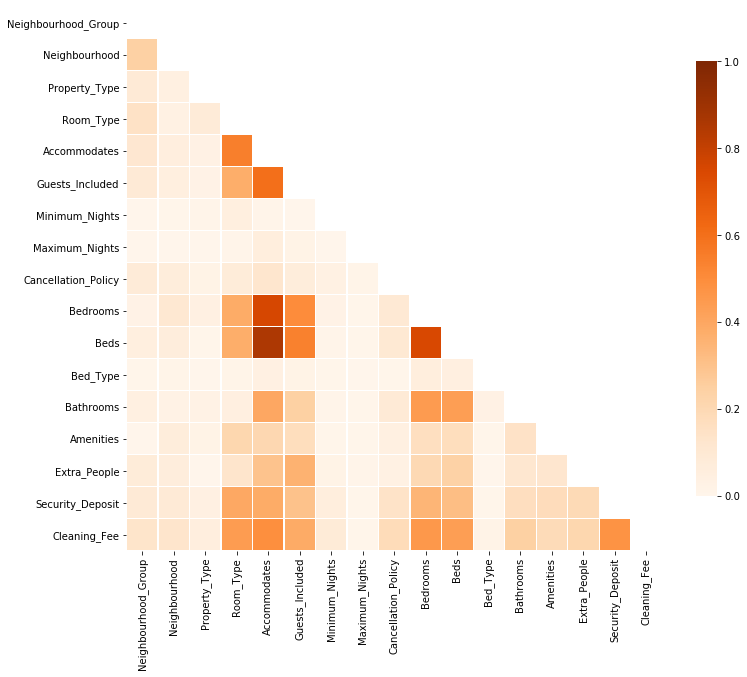

In [101]:
import seaborn as sns

corr = np.abs(data_trn.drop(['Price', 'Reviews_per_Month'], axis = 1).corr())

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (12, 10))

sns.heatmap(corr, mask = mask, vmin = 0.0, vmax = 1.0, center = 0.5, 
            linewidths = .1, cmap = "Oranges", cbar_kws = {"shrink": .8})

plt.show()

In [102]:
data_trn.drop(['Beds', 'Bedrooms'], axis = 1, inplace = True)

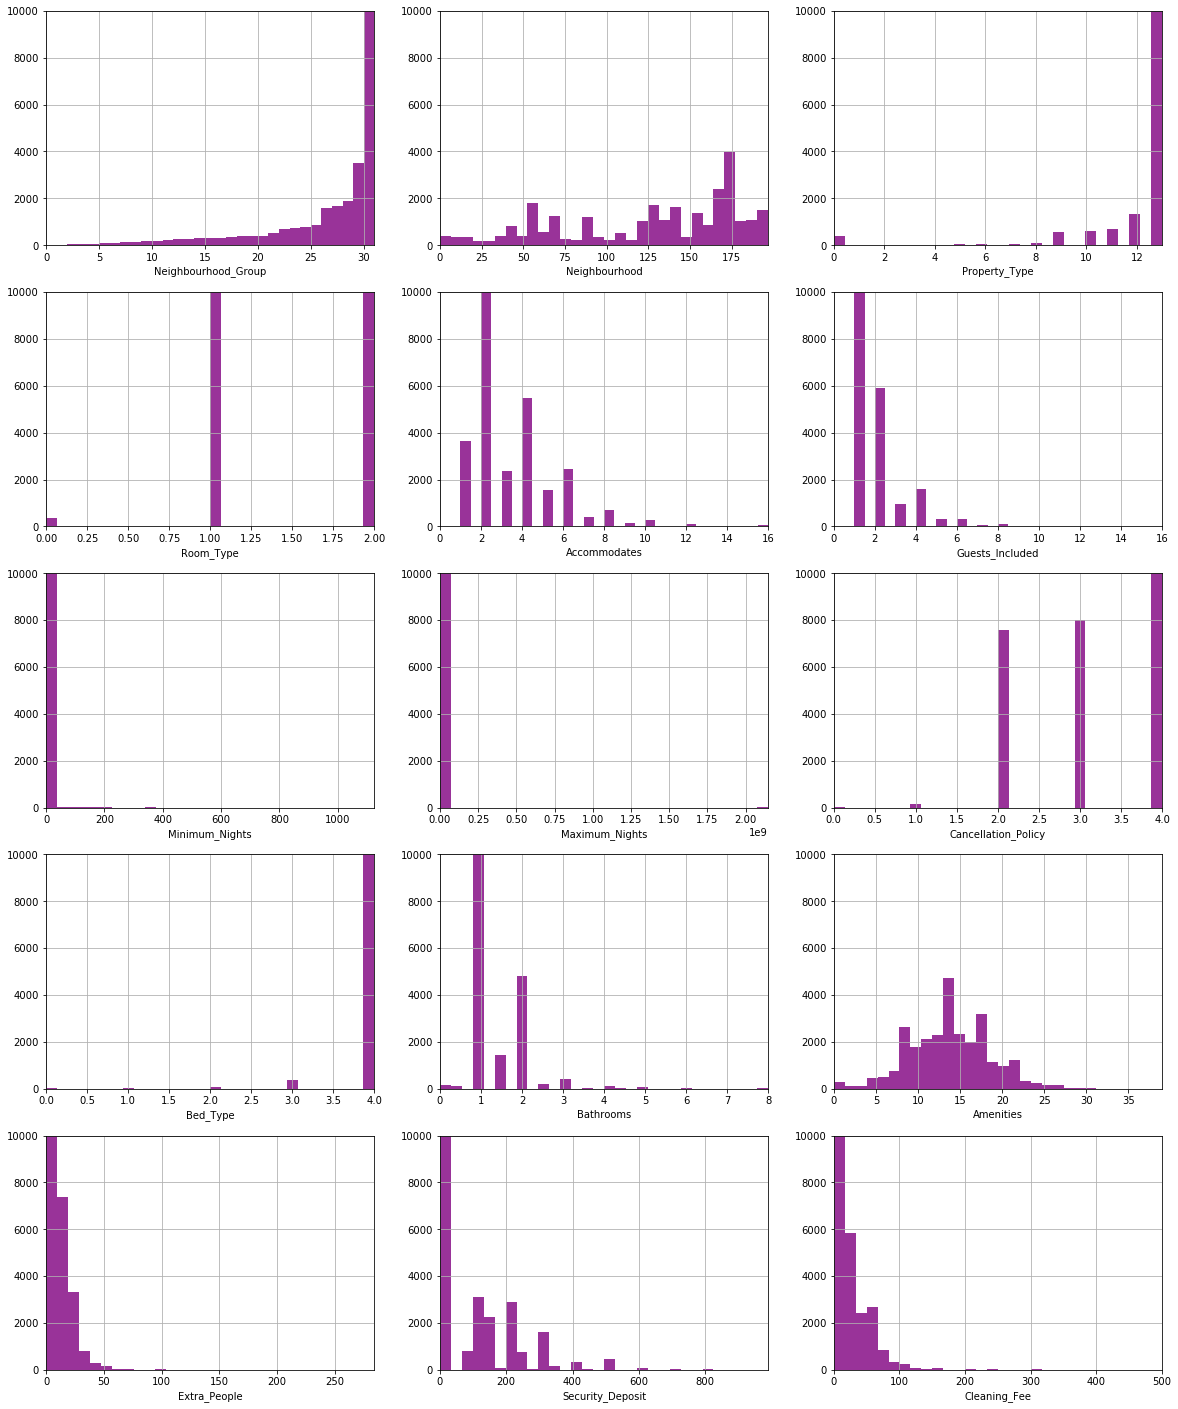

In [103]:
plt.figure(figsize = (20, 25))

for i, feature in enumerate(data_trn.columns.drop(['City', 'License', 'Price', 'Reviews_per_Month'])):
    plt.subplot(5, 3, i+1) 

    data_trn[feature].plot.hist(alpha = 0.8, color = 'purple', bins = 30, grid = True)

    plt.axis([0, np.max(data_trn[feature]), 0, 10000])
    plt.xlabel(feature)
    plt.ylabel("")

plt.show()

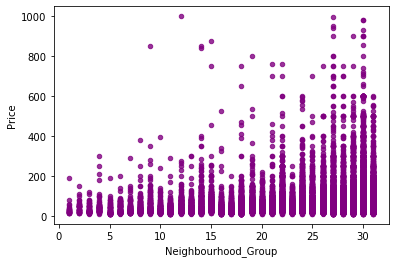

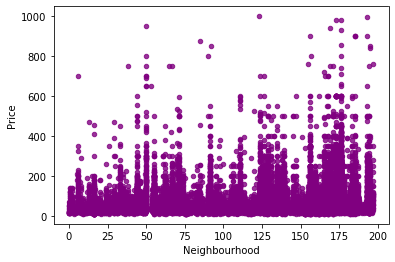

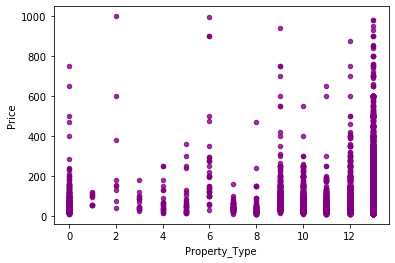

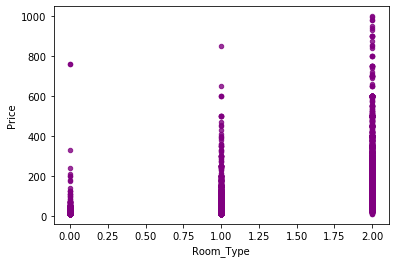

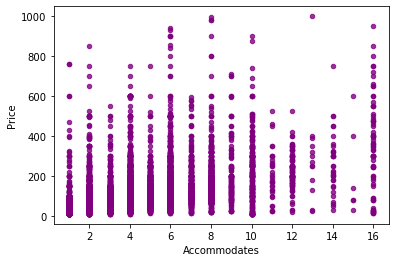

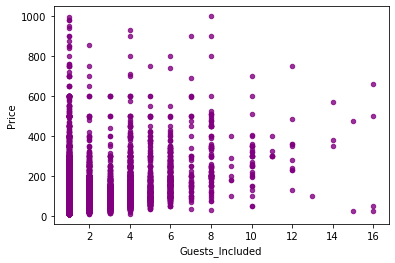

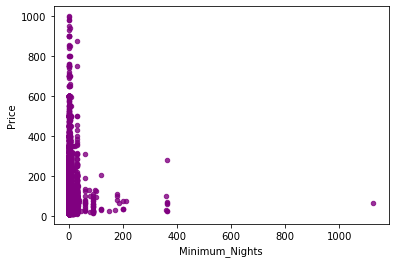

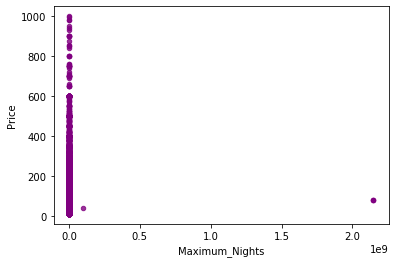

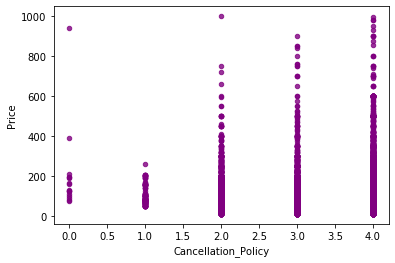

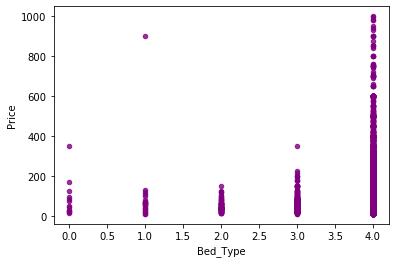

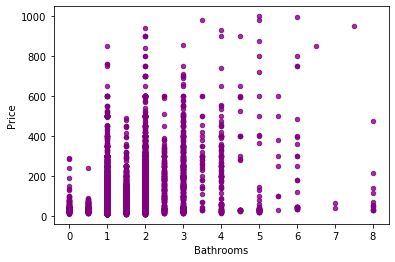

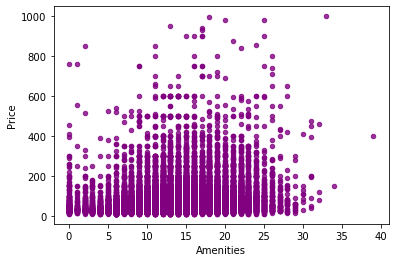

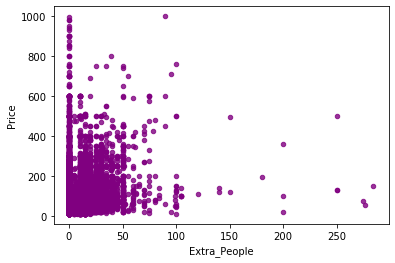

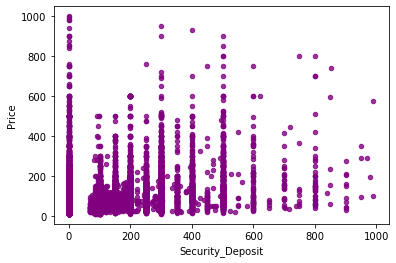

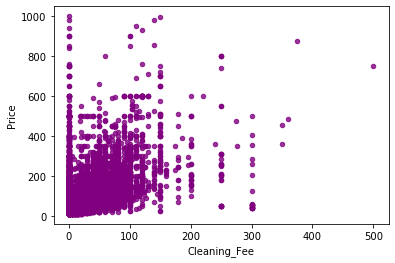

In [104]:
for i, feature in enumerate(data_trn.columns.drop(['City', 'License', 'Price', 'Reviews_per_Month'])):
    data_trn.plot(kind = 'scatter', alpha = 0.8, color = 'purple', x = feature, y = 'Price')
    
    plt.xlabel(feature)
    plt.ylabel("Price")

plt.show()

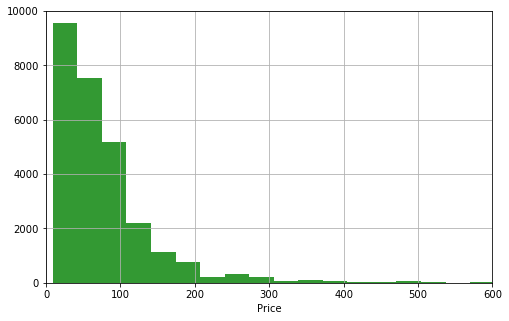

In [105]:
plt.figure(figsize = (8, 5))

data_trn['Price'].plot.hist(alpha = 0.8, color = 'green',
                            bins = 30, grid = True)

plt.axis([0, 600, 0, 10000])
plt.xlabel('Price')
plt.ylabel("")
plt.show()

In [106]:
data_trn['Range Prices'] = np.where((data_trn['Price'] <= 50),
                                    25, data_trn['Price'])
data_trn['Range Prices'] = np.where((data_trn['Range Prices'] > 50)
                                    & (data_trn['Range Prices'] <= 100),
                                    75, data_trn['Range Prices'])
data_trn['Range Prices'] = np.where((data_trn['Range Prices'] > 100)
                                    & (data_trn['Range Prices'] <= 150),
                                    125, data_trn['Range Prices'])
data_trn['Range Prices'] = np.where((data_trn['Range Prices'] > 150)
                                    & (data_trn['Range Prices'] <= 200),
                                    175, data_trn['Range Prices'])
data_trn['Range Prices'] = np.where((data_trn['Range Prices'] > 200)
                                    & (data_trn['Range Prices'] <= 250),
                                    225, data_trn['Range Prices'])
data_trn['Range Prices'] = np.where((data_trn['Range Prices'] > 250) 
                                    & (data_trn['Range Prices'] <= 300),
                                    275, data_trn['Range Prices'])
data_trn['Range Prices'] = np.where((data_trn['Range Prices'] > 300) 
                                    & (data_trn['Range Prices'] <= 350),
                                    325, data_trn['Range Prices'])
data_trn['Range Prices'] = np.where((data_trn['Range Prices'] > 350)
                                    & (data_trn['Range Prices'] <= 400),
                                    375, data_trn['Range Prices'])
data_trn['Range Prices'] = np.where((data_trn['Range Prices'] > 400) 
                                    & (data_trn['Range Prices'] <= 450),
                                    425, data_trn['Range Prices'])
data_trn['Range Prices'] = np.where((data_trn['Range Prices'] > 450)
                                    & (data_trn['Range Prices'] <= 500),
                                    475, data_trn['Range Prices'])
data_trn['Range Prices'] = np.where((data_trn['Range Prices'] > 500)
                                    & (data_trn['Range Prices'] <= 550),
                                    525, data_trn['Range Prices'])
data_trn['Range Prices'] = np.where((data_trn['Range Prices'] > 550),
                                    575, data_trn['Range Prices'])

rp_d = {25.0: 1, 75.0: 2, 125.0: 3, 175.0: 4,
        225.0: 5, 275.0: 6, 325.0: 7, 375.0: 8,
        425.0: 9, 475.0: 10, 525.0: 11, 575.0: 12}

data_trn['Range_Prices'] = data_trn['Range Prices'].map(rp_d)

data_trn.drop(['Range Prices'], axis = 1, inplace = True)

In [107]:
data_trn['Range_Prices'].value_counts()

1     12595
2      9447
3      3126
4      1188
5       493
6       322
7       152
8       102
12       92
10       71
9        49
11       22
Name: Range_Prices, dtype: int64

In [108]:
data_trn['Range_Prices'].describe()

count    27659.000000
mean         1.966557
std          1.415671
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: Range_Prices, dtype: float64

In [109]:
r_d = {1: 'hasta 50€', 2: 'entre 50~100€', 3: 'entre 100~150€',
       4: 'entre 150~200€', 5: 'entre 200~250€', 6: 'entre 250~300€',
       7: 'entre 300~350€', 8: 'entre 350~400€', 9: 'entre 400~450€',
       10: 'entre 450~500€', 11: 'entre 500~550€', 12: 'más de 550€'}

data_trn['Ranges'] = data_trn['Range_Prices'].map(r_d)

In [110]:
data_trn = data_trn[['City', 'License', 'Neighbourhood_Group', 'Neighbourhood',
                     'Property_Type', 'Room_Type', 'Accommodates', 'Guests_Included',
                     'Minimum_Nights', 'Maximum_Nights', 'Cancellation_Policy',
                     'Bed_Type', 'Bathrooms', 'Amenities', 'Extra_People',
                     'Security_Deposit', 'Cleaning_Fee', 'Range_Prices', 'Ranges',
                     'Price', 'Reviews_per_Month']]

In [111]:
data_trn.to_csv('./train_cleaned.csv', sep = ';', decimal = '.', index = False)